# Homework 3

In [10]:
# imports
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

from oceancolor.utils import plotting

import unyt

# [Problem 1]  Survey -- I am really enjoying the class and feel I am gaining the type of intuition I hope for.  Even if I still confuse myself in the class Discussions! :)

# [Problem 2]  Geostrophic adjustment

## We are given a SW problem with the following initial conditions:

## $$ v_i = \begin{cases}
  v_o (x+a)/a & \text{if } -a < x < 0 \\
  v_o (a-x)/a & \text{if } 0 < x < a \\
  0, & \text{else}
\end{cases}
$$

## $$\eta_i = 0$$
## $$u_i = 0$$

## Here is a plot

In [5]:
def calcv(x, a=1, v0=2):
    v = np.zeros_like(x)
    #
    c1 = (x > -a) & (x<=0)
    v[c1] = v0 * (x[c1]+a)/a
    #
    c2 = (x>0) & (x<=a)
    v[c2] = v0 * (a-x[c2])/a
    #
    return v

In [8]:
xs = np.linspace(-5., 5., 1000)
vs = calcv(xs)

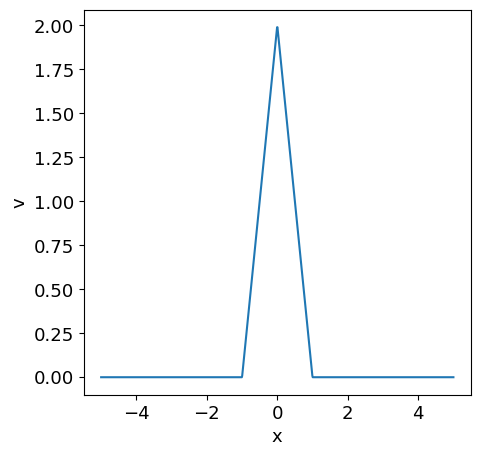

In [12]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

ax.plot(xs, vs)
#
ax.set_xlabel('x')
ax.set_ylabel('v')
#
plotting.set_fontsize(ax,13)
plt.show()

## From lecture, we have derived:

## $\nabla^2 \eta_f - \frac{1}{L_d^2}{\eta_f} = \frac{f}{g} \left ( \frac{\partial v_i}{\partial x} - \frac{\partial u_i}{\partial y} \right ) - \frac{1}{L_d^2}{\eta_i}$

## which for our problem, which is one-dimensional, we have:

## $\frac{\partial^2 \eta}{\partial x^2} - \frac{1}{L_d^2}{\eta} = \frac{f}{g} \frac{\partial v_i}{\partial x}$

## where we will write $\eta = \eta_f$

## Evaluating our expression for $v_i$, we have:

## $$\frac{\partial^2 \eta}{\partial x^2} - \frac{1}{L_d^2}{\eta} = \frac{f}{g} \begin{cases}
  v_o /a & \text{if } -a < x < 0 \\
  -v_o /a & \text{if } 0 < x < a \\
  0, & \text{else}
\end{cases}
$$

## Let's dimensionalize, i.e. let 

## $\tilde x = x/L_d$

## $\frac{1}{L_d^2} \frac{\partial^2 \eta}{\partial \tilde x^2} - \frac{1}{L_d^2}{\eta} = \frac{f}{g} \left [ 0, v_0/a, -v_0/a, 0 \right ]$

## Rearranging..

## $\frac{\partial^2 \eta}{\partial \tilde x^2} - \eta = \frac{L_d^2 f}{g} \frac{v_0}{a} \left [ 0, 1, -1, 0 \right ]$

## and we set:

## $c = \frac{L_d^2 f}{g} \frac{v_0}{a}$

# We were kindly told that this ODE has solutions:

## $$\eta= c \begin{cases}
  -{\rm e}^{\tilde x} (\cosh \tilde a - 1) & \text{if } x < -a \\
  {\rm e}^{\tilde x} - 1 + \frac{1}{2} \left ({\rm e}^{-\tilde a - \tilde x} - {\rm e}^{-\tilde a + \tilde x} \right ) & \text{if } -a < x < 0 \\
  1 - {\rm e}^{-\tilde x} + \frac{1}{2} \left ({\rm e}^{-\tilde a - \tilde x} - {\rm e}^{-\tilde a + \tilde x} \right ) & \text{if } 0 < x < a \\
  {\rm e}^{-\tilde x} (\cosh \tilde a - 1) & \text{if } x > 0 
\end{cases}
$$

## where

## $\tilde a = \frac{a}{L_d}$

## Let's code it up

In [31]:
def final_eta(x, a=1, v0=2, Ld=1, g=9.8, f=1e-4):
    atilde = a / Ld
    c = Ld**2 * f * v0 / g / a
    xtilde = x/Ld
    #
    eta = np.zeros_like(x)
    c0 = x < -a
    eta[c0] = -np.exp(xtilde[c0]) * (np.cosh(atilde) - 1)
    #
    c1 = (x > -a) & (x<=0)
    eta[c1] = np.exp(xtilde[c1]) - 1 + 0.5 * (np.exp(-atilde-xtilde[c1]) - np.exp(-atilde + xtilde[c1]))
    #
    c2 = (x>0) & (x<=a)
    eta[c2] = 1-np.exp(-xtilde[c2]) + 0.5 * (np.exp(-atilde-xtilde[c2]) - np.exp(-atilde + xtilde[c2]))
    #
    c3 = x>a
    eta[c3] = np.exp(-xtilde[c3]) * (np.cosh(atilde)-1)
    #
    return c*eta

In [35]:
eta_f1 = final_eta(xs)
eta_f2 = final_eta(xs, Ld=5)
eta_f3 = final_eta(xs, Ld=0.5)

## Velocities

## $v_f = \frac{g}{f} \frac{\partial \eta}{\partial x}$

In [37]:
# I am going to be lazy and do this numerically

def calc_vf(x, a=1, v0=2, Ld=1, g=9.8, f=1e-4):
    e0 = final_eta(x, a=a, v0=v0, Ld=Ld)
    e1 = final_eta(x+1e-3, a=a, v0=v0, Ld=Ld)
    #
    deta_dx = (e1-e0)/1e-3
    #
    return (g/f) * deta_dx

In [38]:
v_f1 = calc_vf(xs)
v_f2 = calc_vf(xs, Ld=5)
v_f3 = calc_vf(xs, Ld=0.5)

## Plot me

### $\eta$

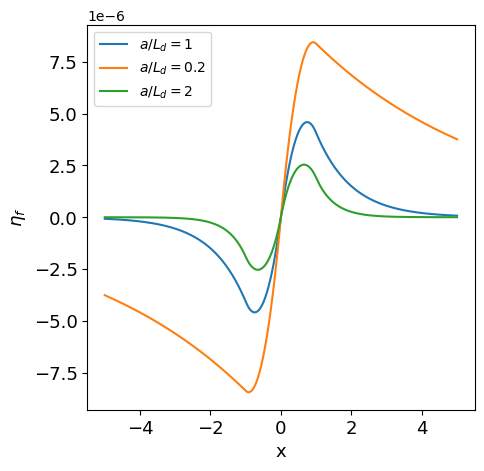

In [36]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

ax.plot(xs, eta_f1,label=r'$a/L_d=1$')
ax.plot(xs, eta_f2,label=r'$a/L_d=0.2$')
ax.plot(xs, eta_f3,label=r'$a/L_d=2$')
#
ax.set_xlabel('x')
ax.set_ylabel(r'$\eta_f$')
#
ax.legend()
plotting.set_fontsize(ax,13)
plt.show()

## As we vary $a/L_d$, larger values lead to a larger height but the width looks invariant.

## $v_f$

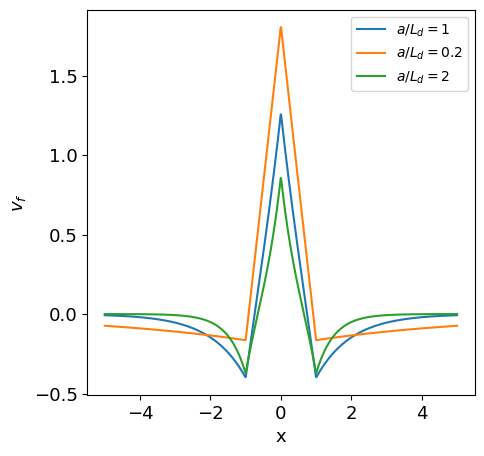

In [39]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

ax.plot(xs, v_f1,label=r'$a/L_d=1$')
ax.plot(xs, v_f2,label=r'$a/L_d=0.2$')
ax.plot(xs, v_f3,label=r'$a/L_d=2$')
#
ax.set_xlabel('x')
ax.set_ylabel(r'$v_f$')
#
ax.legend()
plotting.set_fontsize(ax,13)
plt.show()

## The velocity in our inner region also increases with decreasing $a/L_d$ and the impact beyond $a$ extends to much larger distances.

----

# [Problem 3] Potential vorticity

## We have a cylindrical tank spinning with angular velocity $\Omega$ and has a flat bottom

## (a) How does the height of the water vary with radius?  Let $H$ be the height of the water at the center of the tank.

## Our classic approach would be to balance forces, i.e. Centrigual vs. Pressure force.

## Centrifugal is simple:

## $F_c = \Omega^2 r$

## And pressure force in the radial direction will be:

## $F_p = \frac{\partial p}{\partial r}$

## Akin to our derivation of the SWEs, the pressure of the fluid above $H$ is $p = g\eta$ [ignoring density] with $\eta$ the height of the fluid above $H$ and we have:

## $F_p = g \frac{\partial \eta}{\partial r}$

## Equating,

## $\frac{\partial \eta}{\partial r} = \frac{\Omega^2}{g} r$

## We solve this trivially to derive:

## $\eta = \frac{\Omega^2}{2g} r^2$

## From our GFD perspective, we may have solve this by asserting geostrophy, i.e.

## $v = \frac{g}{f} \frac{\partial \eta}{\partial r}$

## with $v = \Omega r$

## although if I take $f = 2 \Omega$ there is a niggling factor of 2 difference...

## (b) Move a column from the center to distance $r$.  What is its relative vorticity $\zeta$?

## We may conserve $Q'$:

## $\frac{\zeta}{H} - \frac{f\eta}{H^2} = {\rm constant}$

## At $r=0$, $\zeta=\eta=0$ and $Q'=0$

## Now, at distance $r$, we have

## $\eta = \frac{\Omega^2}{2g} r^2$

## Therefore, 

## $\zeta = \frac{f \eta}{H} = \frac{f g r^2 \Omega^2}{2H}$

## If $f = 2 \Omega$ (I still worry about this niggling factor of 2..), then we have:

## $\zeta = \frac{f \eta}{H} = \frac{g r^2 \Omega^3}{H}$

## A rather odd looking quantity..